# My Radar Plot Demo

I use radar plot a lot in cluster analysis, to vizualize and analyze different clusters or groups.
The radar plot code I provide will aggregate desired attributes/fields for each group and vizualize them in a radar plot.

If you want to view the demo straight, skip the **Manipulating and verifying the data** section in which I demonstrate some skills.

## Getting the data

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import sys

data = pd.read_csv('sample_data.csv')
data.head(5)

,Visa_trx_count,batch_timestamp
0,14.0,2018-04-05 21:00:00
1,8.0,2018-04-02 10:00:00
2,8.0,2018-04-02 18:00:00
3,20.0,2018-04-03 07:00:00
4,33.0,2018-04-07 20:00:00


**Now, go to the bottom of this notebook to run the long radar plot code.**

## Manipulating and verifying the data

As you can see, we have 7 days of data. So we should expect 7 x 24 = 168 rows, or the number of unique timestamp should be 168 in case there might be duplicates of timestamp.

In [44]:
data.batch_timestamp.str[:10].unique()

array(['2018-04-05', '2018-04-02', '2018-04-03', '2018-04-07',
       '2018-04-06', '2018-04-04', '2018-04-01'], dtype=object)

In [45]:
len(data.batch_timestamp.unique())

158

Let's make sure we have 24 hours for each of the day in the data. We are gonna do some joining.

In [46]:
data.batch_timestamp = pd.to_datetime(data.batch_timestamp)

FULL_RANGE_TIMESTAMP = pd.DataFrame(
    {'batch_timestamp': pd.date_range(
        start = data.batch_timestamp.dt.date.min(),
        end = data.batch_timestamp.dt.date.max() + pd.Timedelta(days=1),
        freq = '1H',
        closed = 'left')
    }).set_index('batch_timestamp')

FULL_RANGE_TIMESTAMP.head()

""
batch_timestamp
2018-04-01 00:00:00
2018-04-01 01:00:00
2018-04-01 02:00:00
2018-04-01 03:00:00
2018-04-01 04:00:00


In [47]:
# For those missing hours, the transaction count will be 0.

data = FULL_RANGE_TIMESTAMP.join(data.set_index('batch_timestamp'))[['Visa_trx_count']].fillna(0)
data.head()

,Visa_trx_count
batch_timestamp,
2018-04-01 00:00:00,18.0
2018-04-01 01:00:00,92.0
2018-04-01 02:00:00,16.0
2018-04-01 03:00:00,21.0
2018-04-01 04:00:00,18.0


In [48]:
# Now check

len(data.index.unique())

168

Convert the data as below where date is the group and 0-24 is the fields to be aggregated.

In [53]:
ts = data.pivot_table('Visa_trx_count', data.index.day_name().str[:3], data.index.hour, 'median').fillna(0).reset_index()
ts.head()

batch_timestamp,batch_timestamp,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,Fri,17.0,14.0,27.0,31.0,25.0,66.0,0.0,20.0,14.0,...,26.0,13.0,57.0,35.0,9.0,54.0,34.0,14.0,26.0,31.0
1,Mon,37.0,74.0,15.0,0.0,4.0,42.0,13.0,21.0,19.0,...,38.0,28.0,56.0,25.0,8.0,12.0,20.0,20.0,22.0,36.0
2,Sat,25.0,65.0,12.0,18.0,17.0,23.0,30.0,19.0,15.0,...,19.0,16.0,0.0,28.0,16.0,69.0,33.0,17.0,22.0,16.0
3,Sun,18.0,92.0,16.0,21.0,18.0,36.0,24.0,17.0,21.0,...,33.0,19.0,31.0,0.0,3.0,24.0,23.0,23.0,30.0,23.0
4,Thu,22.0,0.0,30.0,34.0,24.0,23.0,27.0,22.0,55.0,...,28.0,16.0,29.0,24.0,18.0,56.0,12.0,14.0,13.0,35.0


Now to prove the aggregation ability, I will insert few rows with duplicated dates.

In [54]:
ts.rename(columns={'batch_timestamp':'Day'}, inplace=True)
new_rows = ts.loc[(2,3,4),:]
new_rows.loc[:,range(24)] = new_rows.loc[:,range(24)] * 2
ts = ts.append(new_rows)
ts

batch_timestamp,Day,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,Fri,17.0,14.0,27.0,31.0,25.0,66.0,0.0,20.0,14.0,...,26.0,13.0,57.0,35.0,9.0,54.0,34.0,14.0,26.0,31.0
1,Mon,37.0,74.0,15.0,0.0,4.0,42.0,13.0,21.0,19.0,...,38.0,28.0,56.0,25.0,8.0,12.0,20.0,20.0,22.0,36.0
2,Sat,25.0,65.0,12.0,18.0,17.0,23.0,30.0,19.0,15.0,...,19.0,16.0,0.0,28.0,16.0,69.0,33.0,17.0,22.0,16.0
3,Sun,18.0,92.0,16.0,21.0,18.0,36.0,24.0,17.0,21.0,...,33.0,19.0,31.0,0.0,3.0,24.0,23.0,23.0,30.0,23.0
4,Thu,22.0,0.0,30.0,34.0,24.0,23.0,27.0,22.0,55.0,...,28.0,16.0,29.0,24.0,18.0,56.0,12.0,14.0,13.0,35.0
5,Tue,38.0,115.0,9.0,22.0,70.0,38.0,32.0,20.0,9.0,...,34.0,37.0,58.0,18.0,4.0,22.0,41.0,16.0,0.0,62.0
6,Wed,48.0,0.0,42.0,24.0,17.0,20.0,24.0,12.0,41.0,...,11.0,21.0,17.0,27.0,88.0,14.0,14.0,57.0,8.0,20.0
2,Sat,50.0,130.0,24.0,36.0,34.0,46.0,60.0,38.0,30.0,...,38.0,32.0,0.0,56.0,32.0,138.0,66.0,34.0,44.0,32.0
3,Sun,36.0,184.0,32.0,42.0,36.0,72.0,48.0,34.0,42.0,...,66.0,38.0,62.0,0.0,6.0,48.0,46.0,46.0,60.0,46.0
4,Thu,44.0,0.0,60.0,68.0,48.0,46.0,54.0,44.0,110.0,...,56.0,32.0,58.0,48.0,36.0,112.0,24.0,28.0,26.0,70.0


# Demo for radar plot - Now we are ready

For time series data, I will prefer to use line chart to see the trends instead of radar plot, but this is just a demo.

In [55]:
ts

batch_timestamp,Day,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,Fri,17.0,14.0,27.0,31.0,25.0,66.0,0.0,20.0,14.0,...,26.0,13.0,57.0,35.0,9.0,54.0,34.0,14.0,26.0,31.0
1,Mon,37.0,74.0,15.0,0.0,4.0,42.0,13.0,21.0,19.0,...,38.0,28.0,56.0,25.0,8.0,12.0,20.0,20.0,22.0,36.0
2,Sat,25.0,65.0,12.0,18.0,17.0,23.0,30.0,19.0,15.0,...,19.0,16.0,0.0,28.0,16.0,69.0,33.0,17.0,22.0,16.0
3,Sun,18.0,92.0,16.0,21.0,18.0,36.0,24.0,17.0,21.0,...,33.0,19.0,31.0,0.0,3.0,24.0,23.0,23.0,30.0,23.0
4,Thu,22.0,0.0,30.0,34.0,24.0,23.0,27.0,22.0,55.0,...,28.0,16.0,29.0,24.0,18.0,56.0,12.0,14.0,13.0,35.0
5,Tue,38.0,115.0,9.0,22.0,70.0,38.0,32.0,20.0,9.0,...,34.0,37.0,58.0,18.0,4.0,22.0,41.0,16.0,0.0,62.0
6,Wed,48.0,0.0,42.0,24.0,17.0,20.0,24.0,12.0,41.0,...,11.0,21.0,17.0,27.0,88.0,14.0,14.0,57.0,8.0,20.0
2,Sat,50.0,130.0,24.0,36.0,34.0,46.0,60.0,38.0,30.0,...,38.0,32.0,0.0,56.0,32.0,138.0,66.0,34.0,44.0,32.0
3,Sun,36.0,184.0,32.0,42.0,36.0,72.0,48.0,34.0,42.0,...,66.0,38.0,62.0,0.0,6.0,48.0,46.0,46.0,60.0,46.0
4,Thu,44.0,0.0,60.0,68.0,48.0,46.0,54.0,44.0,110.0,...,56.0,32.0,58.0,48.0,36.0,112.0,24.0,28.0,26.0,70.0


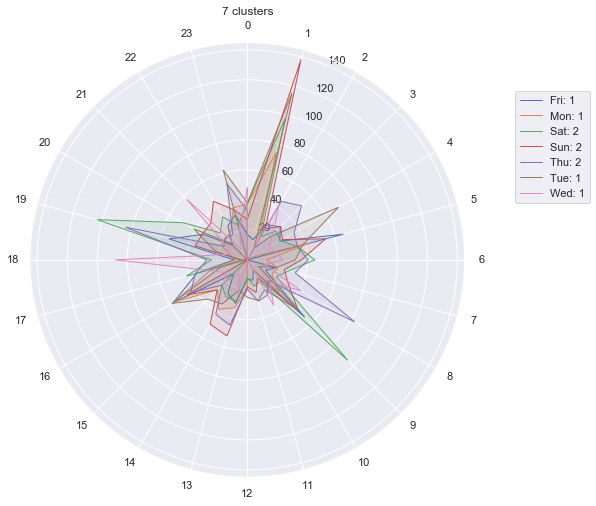

In [56]:
# First parameter: data
# Second parameter: cluster / group field name or list of clusters with matching length
# Third parameter: attribute field to aggregate and show. Default to all fields other than the cluster field specified
# Fourth parameter: desired aggregation like mean, np.median or any method that return a numeric value. Currently this
#                   value will apply to ALL attribute fields. Default to 'mean'

plot_cluster_radar(ts, 'Day')

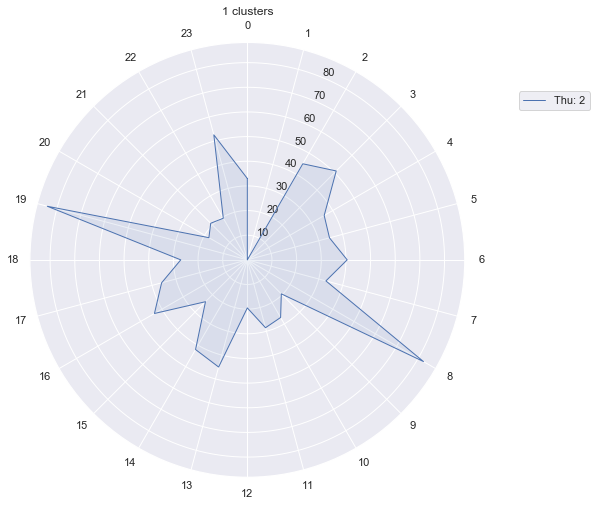

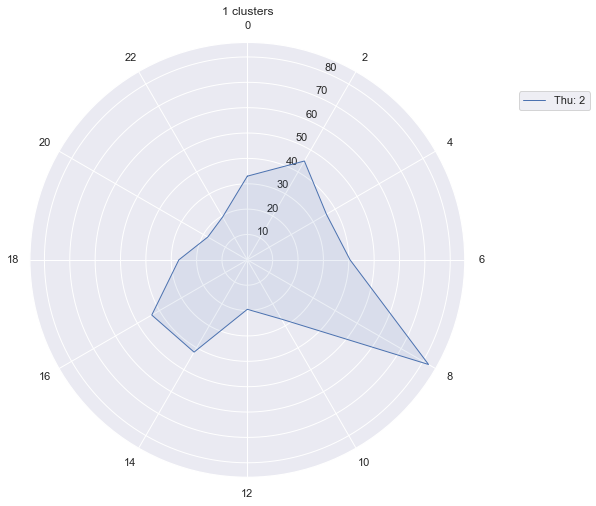

In [63]:
# View only 1 day

plot_cluster_radar(ts[ts.Day=='Thu'], 'Day')

# View only 1 day, and only at even hours

plot_cluster_radar(ts[ts.Day=='Thu'], 'Day', list(range(0,24,2)))

Highest transaction count on Thu, 7pm.

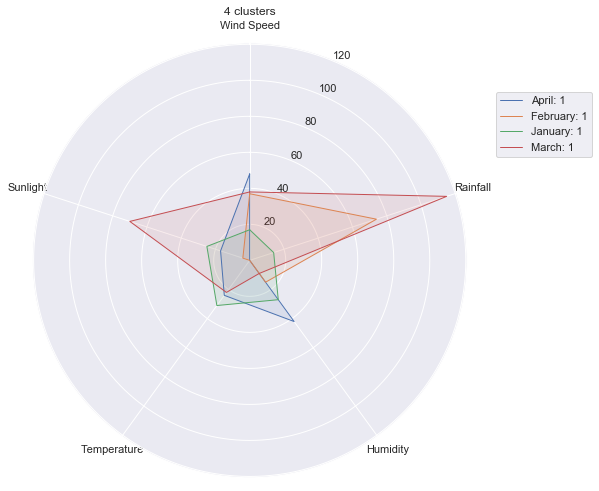

In [80]:
# ts.rename(columns={'Day':'Month', 0:'Wind Speed', 1:'Rainfall', 2:'Humidity', 3:'Temperature', 4:'Sunlight'}, inplace=True)
# ts.loc[ts.Month.isin(['Fri','Mon','Tue','Wed']), 'Month'] = ['January','February','March','April']
weather = ts.iloc[[0,1,5,6],:6]

plot_cluster_radar(weather, 'Month')

# The code

In [11]:
def plot_cluster_radar(data, cluster_label, features=None, center=np.mean, ax=None, figsize=(8,8), legend_loc=(1.3,0.9), labels=None): 
    if data.__class__.__name__ == 'DataFrame':
        hasClusterInDF = cluster_label.__class__.__name__ == 'str'
        noFeaturesGiven = features.__class__.__name__ == 'NoneType'
        
        if noFeaturesGiven:
            features = data.columns.drop(cluster_label).tolist() if hasClusterInDF else data.columns.tolist()
                
        if hasClusterInDF:
            cluster_label = data[cluster_label]
            
        data = data[features].values
    
    if ax.__class__.__name__ == 'NoneType':
        fig, ax = plt.subplots(1, figsize=figsize, subplot_kw={'projection': 'polar'})
        
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    angles = np.linspace(0, 2*np.pi, len(features), endpoint=False) # Set the angle
    angles = np.concatenate((angles,[angles[0]]))
    ax.grid(True)
    ax.set_thetagrids(angles * 180/np.pi, features)
    
    for i, group in enumerate(np.unique(cluster_label)):
        indices = np.where(cluster_label==group)
        
        if labels.__class__.__name__ != 'NoneType':
            group = labels[i]
        
        stats = center(data[indices], axis=0)
        stats = np.concatenate((stats, [stats[0]]))
        ax.plot(angles, stats, linewidth=1, linestyle='solid', label='{}: {}'.format(group, indices[0].shape[0]))
        ax.fill(angles, stats, alpha=0.1)

    n_clusters = np.unique(cluster_label)
    ax.set_title('{} clusters'.format(n_clusters[n_clusters!=-1].shape[0]))
    ax.legend(loc='upper right', bbox_to_anchor=legend_loc)